<a href="https://colab.research.google.com/github/diggibyte/dsplayground/blob/main/LSTM_model_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten 

In [4]:
#preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
  X,y = [],[]
  for i in range(len(timeseries_data)):
    #find the end of this pattern
    end_ix =i + n_features
    #check if we are beyond the sequence
    if end_ix > len(timeseries_data)-1:
      break
    #gather input and output parts of the pattern
    seq_x,seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)



In [5]:
#define input sequence
timeseries_data = [110,125,133,146,158,172,187,196,210]
#choose number of time steps
n_steps = 3
#split into samples
X,y = prepare_data(timeseries_data, n_steps)


In [6]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [7]:
#reshape from [samples,timesteps] to [samples,timesteps, features]
n_features= 1
X = X.reshape((X.shape[0],X.shape[1],n_features))

In [8]:
# Building LSTM Model


In [9]:
#define model
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences = True, input_shape =(n_steps, n_features)))
model.add(LSTM(50,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer ='adam',loss ='mse')

In [10]:
#fit model
model.fit(X,y, epochs = 300, verbose = 1)

Epoch 1/300
1/1 [==============================] - 5s 5s/step - loss: 32124.9688
Epoch 2/300
1/1 [==============================] - 0s 27ms/step - loss: 31818.8906
Epoch 3/300
1/1 [==============================] - 0s 22ms/step - loss: 31496.5469
Epoch 4/300
1/1 [==============================] - 0s 28ms/step - loss: 31166.6582
Epoch 5/300
1/1 [==============================] - 0s 23ms/step - loss: 30846.1660
Epoch 6/300
1/1 [==============================] - 0s 32ms/step - loss: 30505.5938
Epoch 7/300
1/1 [==============================] - 0s 23ms/step - loss: 30100.6406
Epoch 8/300
1/1 [==============================] - 0s 40ms/step - loss: 29602.9785
Epoch 9/300
1/1 [==============================] - 0s 29ms/step - loss: 29032.6719
Epoch 10/300
1/1 [==============================] - 0s 34ms/step - loss: 28361.0723
Epoch 11/300
1/1 [==============================] - 0s 33ms/step - loss: 27602.3809
Epoch 12/300
1/1 [==============================] - 0s 43ms/step - loss: 26774.7656
Epo

In [11]:
#Predicting for the next 10 days

In [12]:
from array import array

In [13]:
#demonstrate the prediction for the next 10 days

x_input = np.array([187,196,210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[225.44019]
1 day input [196.         210.         225.44018555]
1 day output [[237.22713]]
2 day input [210.         225.44018555 237.22712708]
2 day output [[252.22696]]
3 day input [225.44019 237.22713 252.22696]
3 day output [[267.78305]]
4 day input [237.22713 252.22696 267.78305]
4 day output [[281.97754]]
5 day input [252.22696 267.78305 281.97754]
5 day output [[298.39655]]
6 day input [267.78305 281.97754 298.39655]
6 day output [[315.26892]]
7 day input [281.97754 298.39655 315.26892]
7 day output [[331.99454]]
8 day input [298.39655 315.26892 331.99454]
8 day output [[350.46527]]
9 day input [315.26892 331.99454 350.46527]
9 day output [[369.5704]]
[225.44019, 237.22713, 252.22696, 267.78305, 281.97754, 298.39655, 315.26892, 331.99454, 350.46527, 369.5704]


In [14]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [15]:
len(timeseries_data)

9

In [16]:
lst_output

[225.44019,
 237.22713,
 252.22696,
 267.78305,
 281.97754,
 298.39655,
 315.26892,
 331.99454,
 350.46527,
 369.5704]

In [17]:
#Visualising the output

In [18]:
import matplotlib.pyplot as plt
from array import array

In [19]:
day_new = np.arange(1,10)
day_pred = np.arange(10,20)


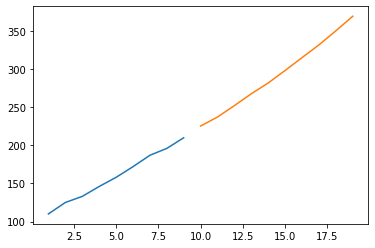

In [20]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)